# Data Exploration 
In this section, I explore the data as a first step to understand the characteristics of the data that we will be building models off of. I explore how balanced it is and explore which features appear to be correlated. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/shopping_behavior_updated.csv')

In [3]:
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
0                Yes                  14          Venmo            Fortnightly  
1                Yes                   2           Cash            Fortnightly  
2                Yes                  23    Credit Card                 Weekly  
3                Yes                  49         PayPal                 Weekly  
4                Yes                  31         PayPal               Annually  
...              ...                 ...            ...                    ...  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly  

[3900 rows x 18 columns]

In [4]:
# Add a category of purchase amount - below at or above average - for bucketed analysis later on 
# Purchases range amount 20 - 100, so do 20-46, 46-73, 73-100
def find_category(number):
    if number < 46:
        return 'below average'
    elif (number >= 46 and number < 73):
        return 'average'
    else:
        return 'above average'

df['Purchase Amount Category'] = df['Purchase Amount (USD)'].apply(find_category)

In [5]:
# Visually explore the data
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method  \
0                Yes                  14          Venmo   
1                Yes                   2           Cash   
2                Yes                  23    Credit Card   
3                Yes                  49         PayPal   
4                Yes                  31         PayPal   
...              ...                 ...            ...   
3895              No                  32          Venmo   
3896              No                  41  Bank Transfer   
3897              No                  24          Venmo   
3898              No                  24          Venmo   
3899              No                  33          Venmo   

     Frequency of Purchases Purchase Amount Category  
0               Fortnightly                  average  
1               Fortnightly                  average  
2                    Weekly            above average  
3                    Weekly            above average  
4                  Annually                  average  
...                     ...                      ...  
3895                 Weekly            below average  
3896              Bi-Weekly                  average  
3897              Quarterly            below average  
3898                 Weekly            above average  
3899              Quarterly            above average  

[3900 rows x 19 columns]

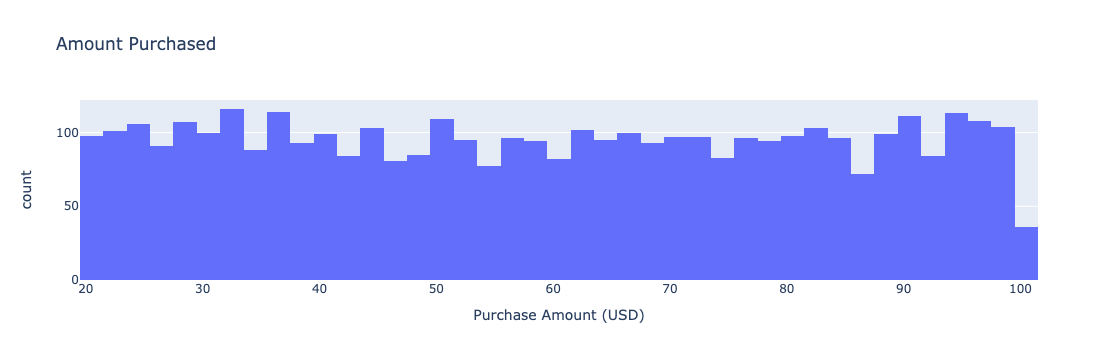

In [6]:
# Look at amount purchased
fig = px.histogram(df, x = 'Purchase Amount (USD)', title = 'Amount Purchased')
fig.write_image('data_visualization/amount_purchased.png')
fig.show()

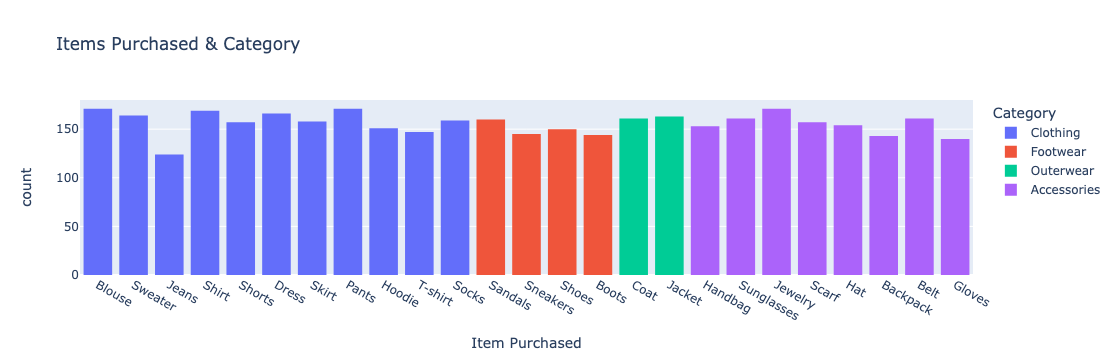

In [7]:
# Look at item purchased & category
fig = px.histogram(df, x = 'Item Purchased', color = 'Category', title = 'Items Purchased & Category')
fig.write_image('data_visualization/item_purchased_and_cat.png')
fig.show()

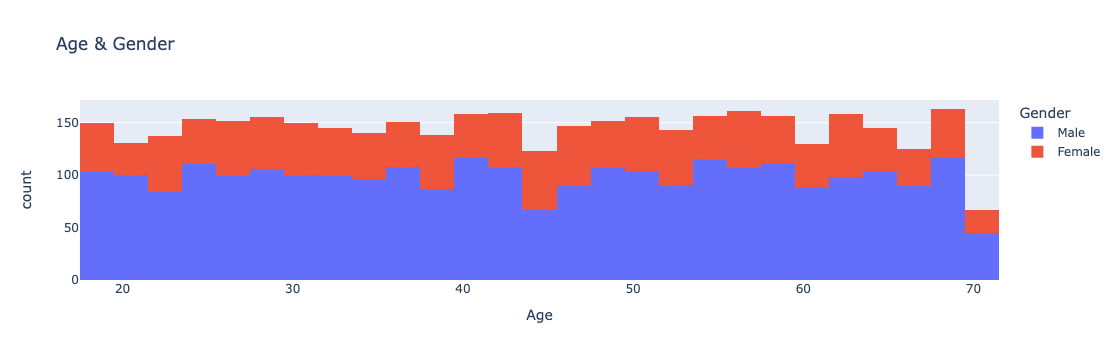

In [8]:
# Look at age & gender splits
fig = px.histogram(df, x = 'Age', color = 'Gender', title = 'Age & Gender')
fig.write_image('data_visualization/age_gender.png')
fig.show()

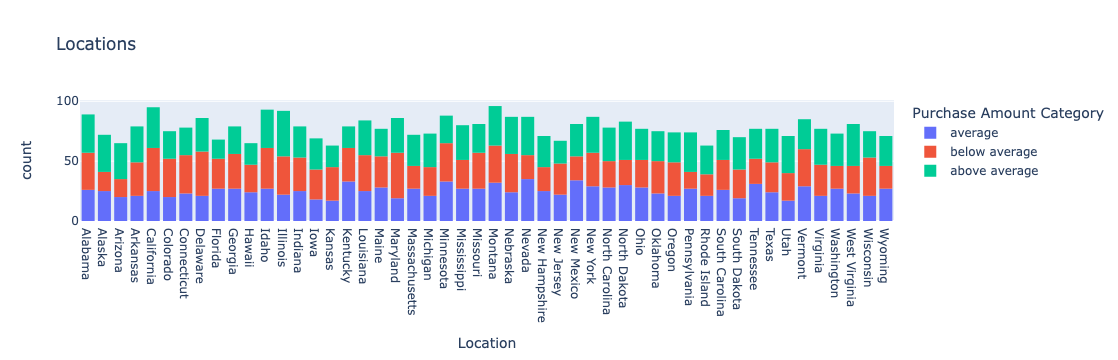

In [9]:
# Look at locations
fig = px.histogram(df.sort_values(by = 'Location'), x = 'Location', color = 'Purchase Amount Category', title = 'Locations')
fig.write_image('data_visualization/location.png')
fig.show()

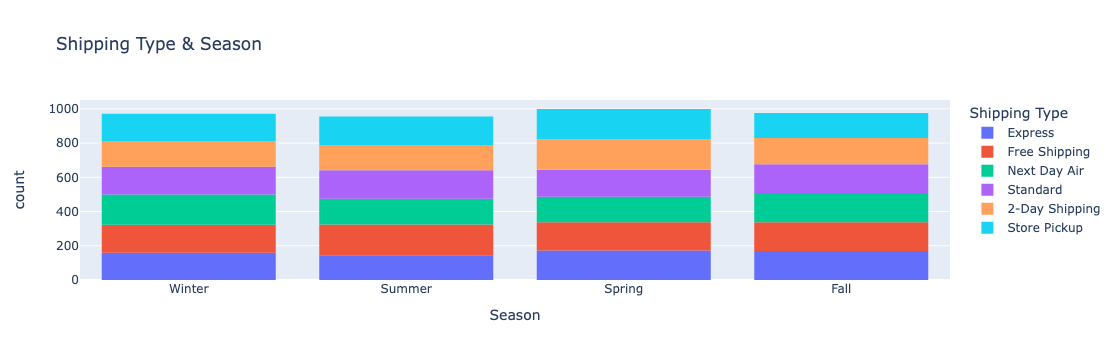

In [10]:
# Look at shipping type and season
fig = px.histogram(df, x = 'Season', color = 'Shipping Type', title = 'Shipping Type & Season')
fig.write_image('data_visualization/shipping.png')
fig.show()

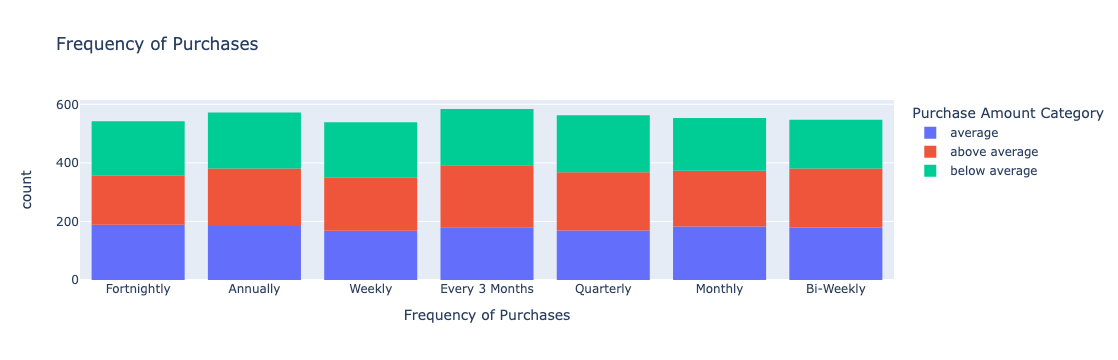

In [11]:
# Look at Frequency of Purchases
fig = px.histogram(df, x = 'Frequency of Purchases', color = 'Purchase Amount Category', title = 'Frequency of Purchases')
fig.write_image('data_visualization/purchase_freq.png')
fig.show()

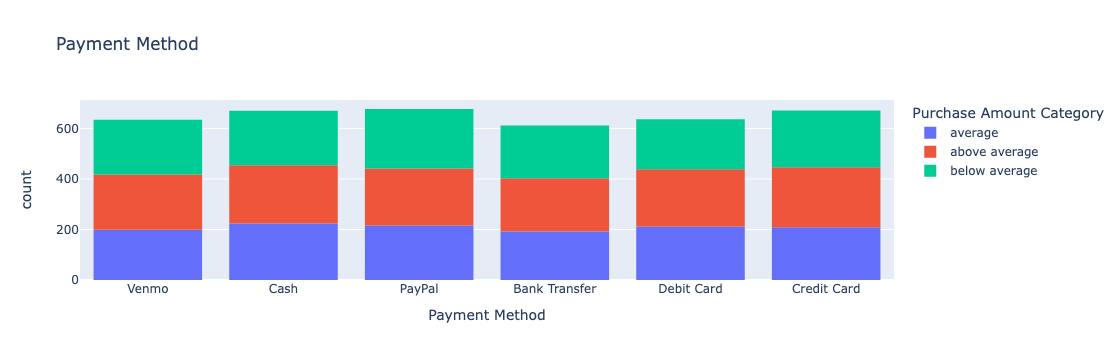

In [12]:
# Look at payment method
fig = px.histogram(df, x = 'Payment Method', color = 'Purchase Amount Category', title = 'Payment Method')
fig.write_image('data_visualization/payment.png')
fig.show()

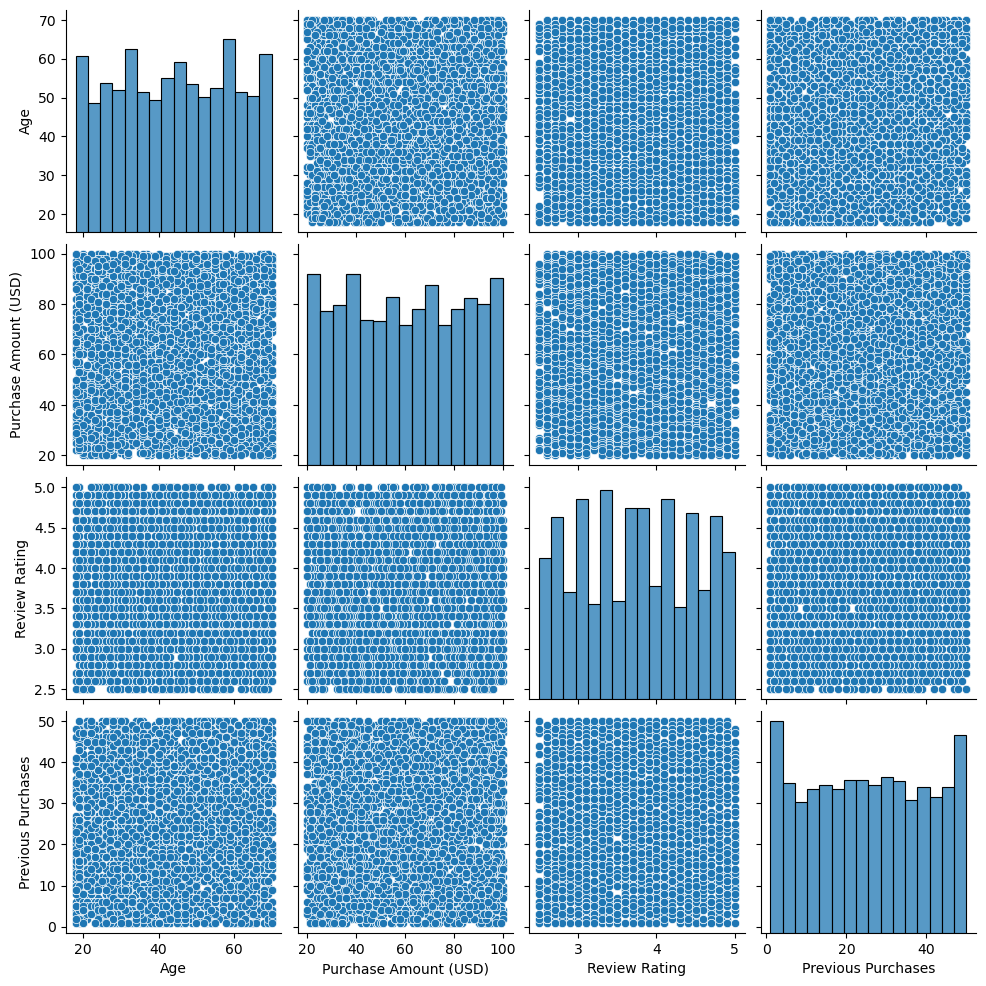

In [13]:
# Investigate how numerical columns are correlated
sns.pairplot(df.select_dtypes('number').drop(columns = 'Customer ID').dropna())
plt.savefig('data_visualization/numerical.png')

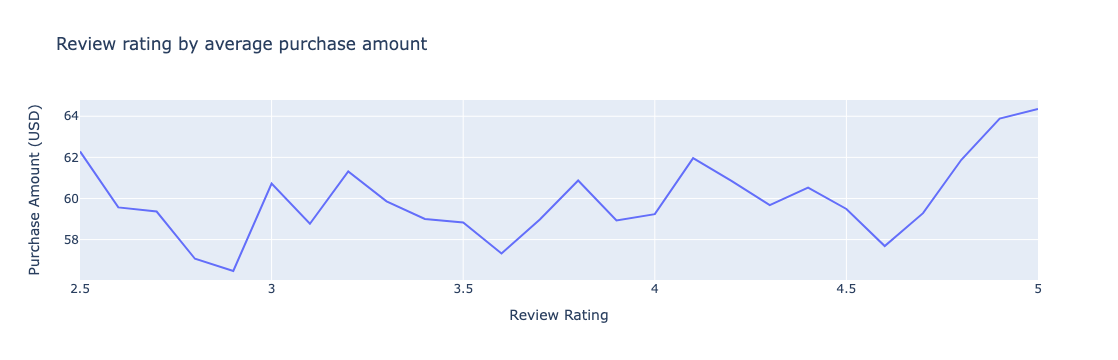

In [14]:
# Look at scatter of rating compared to average purchase amount
averaged_df = df[['Review Rating', 'Purchase Amount (USD)']].groupby('Review Rating').mean()
fig = px.line(averaged_df, x = averaged_df.index, y = 'Purchase Amount (USD)', title = 'Review rating by average purchase amount')
fig.write_image('data_visualization/rating_v_purchase_amt.png')
fig.show()

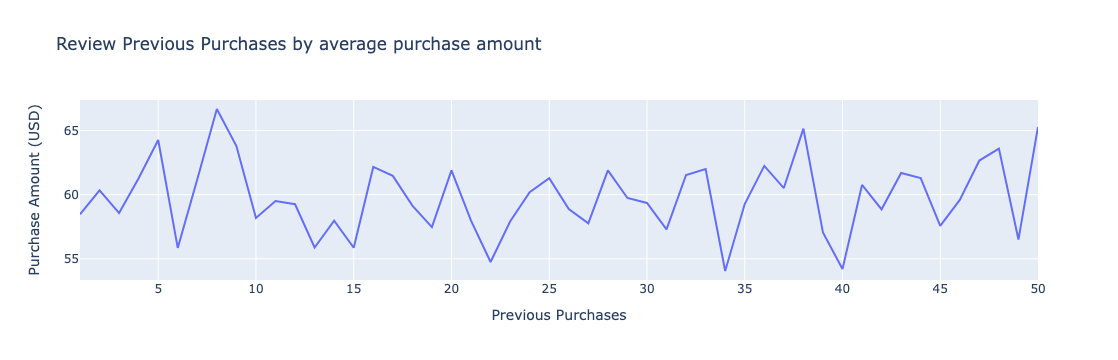

In [15]:
# Do the same for previous purchases
averaged_df = df[['Previous Purchases', 'Purchase Amount (USD)']].groupby('Previous Purchases').mean()
fig = px.line(averaged_df, x = averaged_df.index, y = 'Purchase Amount (USD)', title = 'Review Previous Purchases by average purchase amount')
fig.write_image('data_visualization/prev_purch.png')
fig.show()

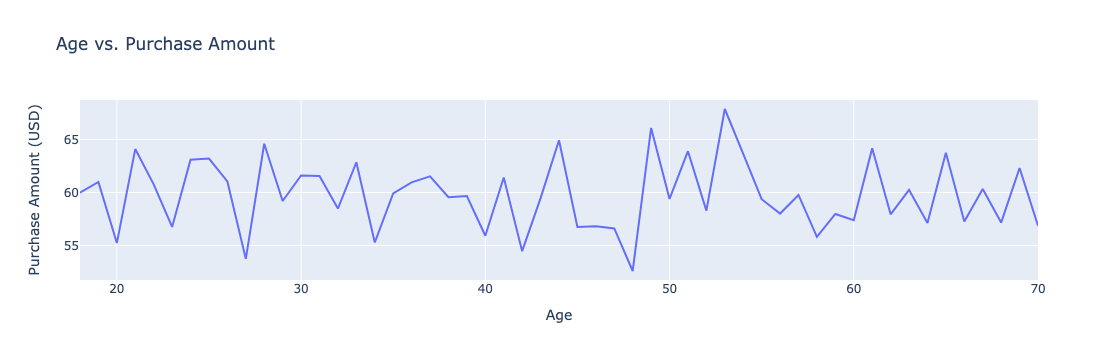

In [16]:
# And lastly, age as compared to purchase amount
averaged_df = df[['Age', 'Purchase Amount (USD)']].groupby('Age').mean()
fig = px.line(averaged_df, x = averaged_df.index, y = 'Purchase Amount (USD)', title = 'Age vs. Purchase Amount')
fig.write_image('data_visualization/age.png')
fig.show()

In [17]:
# Create a helper method that compares the average purchase amount with and without the given feature 
def print_impact_on_purchase_amount(column, name_to_print):
    yes_avg_purchase = df[df[column] == 'Yes']['Purchase Amount (USD)'].mean()
    no_avg_purchase = df[df[column] == 'No']['Purchase Amount (USD)'].mean()
   
    print("Average purchase amount w/ " + name_to_print + ": " + str(round(yes_avg_purchase, 2)))
    print("Average purchase amount w/o " + name_to_print + ": " + str(round(no_avg_purchase, 2)))

In [18]:
# Explore the subscription impact on average purchase
print_impact_on_purchase_amount('Subscription Status', 'subscription')

Average purchase amount w/ subscription: 59.49
Average purchase amount w/o subscription: 59.87


In [19]:
# Explore the discount impact on average purchase
print_impact_on_purchase_amount('Discount Applied', 'discount')

Average purchase amount w/ discount: 59.28
Average purchase amount w/o discount: 60.13


In [20]:
# Explore the Promo Code impact
print_impact_on_purchase_amount('Promo Code Used', 'promo code')

Average purchase amount w/ promo code: 59.28
Average purchase amount w/o promo code: 60.13


### What we've learned from the above:
- Our two outcomes variables - purchase amount and item - are roughly evenly distributed in terms of counts of each type. 
- The categories are not evenly distributed - mostly it's clothing
- Data has more males than females
- The data is roughly evenly spread across the various states, but each state has differing proportion of below, average, and high amount of purchases
- There is even distribution among seasons and within each season, it's a roughly similar distribution of shipping types which was surprising to me as I expected there to be more rushed shipping in winter because of the holidays
- Frequency of purchases and payment method are also pretty evenly spaced and the distribution of amount of purchase category is about the same for each
- The correlation matrices tell us nothing and make it look like none of the numerical features (age, review rating, and number of previous purchases) say much about the expected purchase amount
- Looking at these numerical features in another way - by average purchase amount for each value - shows that avg. purchase amount is highest for lowest and highest ratings, but that previous purchases and age still do not seem to have any sort of relationship with avg. purchase amount
- Lastly, looking at average purchase amount for subscriptions vs. not, discount vs. not, and promo vs. not revails that none of these have a significant impact on purchase amount which is surprising. I would expect subscriptions to increase the purchase amount for sure. I would also assume that promo codes would lead to higher purchase amount, however one thing that is not clear from the dataset description is whether the purchase amount includes the discount or not. If it does, the actual price of the item may be higher, but with the discount the purchase amount could seem lower.

To summarize, the data is quite evenly distributed and we are not able to tell yet which features may impact purchase amount or item purchased, so building an AI model will be necessary here to find these influential features. 